In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss, classification_report
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


In [2]:
data_train = pd.read_csv('F:/毕业论文/数据/data_train.csv')

# 归一化

In [3]:
gyh_train = data_train.copy()

In [4]:
gyh_train=gyh_train.drop(['id'],axis=1)
gyh_train=gyh_train.drop(['issueDate'],axis=1)

In [5]:
gyh_train.columns

Index(['Unnamed: 0', 'loanAmnt', 'term', 'interestRate', 'installment',
       'grade', 'subGrade', 'employmentTitle', 'employmentLength',
       'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'issueDateDT'],
      dtype='object')

In [6]:
#归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(gyh_train)

In [7]:
train_minmax = pd.DataFrame(train_minmax)

In [8]:
train_minmax.columns=['Unnamed: 0', 'loanAmnt', 'term', 'interestRate', 'installment',
       'grade', 'subGrade', 'employmentTitle', 'employmentLength',
       'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'issueDateDT']
train_minmax

,Unnamed: 0,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT
0,0.000000,0.873418,1.0,0.553349,0.530837,0.666667,0.617647,0.000846,0.2,0.4,...,0.060606,0.050633,0.086614,0.044444,0.085366,0.0,0.0,0.000000,0.066667,0.615806
1,0.000001,0.443038,1.0,0.513240,0.262518,0.500000,0.470588,0.581056,0.5,0.0,...,0.053030,0.088608,0.094488,0.111111,0.158537,0.0,0.0,0.000000,0.066667,0.449417
2,0.000003,0.291139,1.0,0.454829,0.166191,0.500000,0.500000,0.083779,0.8,0.0,...,0.159091,0.050633,0.031496,0.066667,0.134146,0.0,0.0,0.000000,0.133333,0.724589
3,0.000004,0.265823,0.0,0.075935,0.191366,0.000000,0.088235,0.123837,1.0,0.2,...,0.030303,0.088608,0.157480,0.133333,0.109756,0.0,0.0,0.000000,0.033333,0.710069
4,0.000005,0.063291,0.0,0.299065,0.050232,0.333333,0.323529,0.000143,0.6,0.2,...,0.068182,0.126582,0.110236,0.155556,0.146341,0.0,0.0,0.000000,0.133333,0.760771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0.999995,0.620253,0.0,0.357477,0.496973,0.333333,0.382353,0.007028,0.7,0.2,...,0.015152,0.151899,0.094488,0.222222,0.170732,0.0,0.0,0.000000,0.100000,0.789812
799996,0.999996,0.417722,0.0,0.100857,0.303725,0.000000,0.088235,0.077190,1.0,0.0,...,0.121212,0.025316,0.141732,0.044444,0.085366,0.0,0.0,0.000000,0.000000,0.507260
799997,0.999997,0.139241,0.0,0.312305,0.110270,0.333333,0.352941,0.006824,1.0,0.2,...,0.196970,0.050633,0.070866,0.088889,0.060976,0.0,0.0,0.025641,0.133333,0.724589
799998,0.999999,0.473418,0.0,0.062695,0.339142,0.000000,0.088235,0.000399,1.0,0.0,...,0.045455,0.151899,0.165354,0.177778,0.195122,0.0,0.0,0.000000,0.166667,0.666984


In [9]:
train_minmax=train_minmax.drop(['Unnamed: 0'],axis=1)
train_minmax['isDefault']=data_train['isDefault']


In [10]:
train_minmax

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT
0,0.873418,1.0,0.553349,0.530837,0.666667,0.617647,0.000846,0.2,0.4,0.010001,...,0.060606,0.050633,0.086614,0.044444,0.085366,0.0,0.0,0.000000,0.066667,0.615806
1,0.443038,1.0,0.513240,0.262518,0.500000,0.470588,0.581056,0.5,0.0,0.004182,...,0.053030,0.088608,0.094488,0.111111,0.158537,0.0,0.0,0.000000,0.066667,0.449417
2,0.291139,1.0,0.454829,0.166191,0.500000,0.500000,0.083779,0.8,0.0,0.006728,...,0.159091,0.050633,0.031496,0.066667,0.134146,0.0,0.0,0.000000,0.133333,0.724589
3,0.265823,0.0,0.075935,0.191366,0.000000,0.088235,0.123837,1.0,0.2,0.010728,...,0.030303,0.088608,0.157480,0.133333,0.109756,0.0,0.0,0.000000,0.033333,0.710069
4,0.063291,0.0,0.299065,0.050232,0.333333,0.323529,0.000143,0.6,0.2,0.002637,...,0.068182,0.126582,0.110236,0.155556,0.146341,0.0,0.0,0.000000,0.133333,0.760771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0.620253,0.0,0.357477,0.496973,0.333333,0.382353,0.007028,0.7,0.2,0.006546,...,0.015152,0.151899,0.094488,0.222222,0.170732,0.0,0.0,0.000000,0.100000,0.789812
799996,0.417722,0.0,0.100857,0.303725,0.000000,0.088235,0.077190,1.0,0.0,0.009001,...,0.121212,0.025316,0.141732,0.044444,0.085366,0.0,0.0,0.000000,0.000000,0.507260
799997,0.139241,0.0,0.312305,0.110270,0.333333,0.352941,0.006824,1.0,0.2,0.005910,...,0.196970,0.050633,0.070866,0.088889,0.060976,0.0,0.0,0.025641,0.133333,0.724589
799998,0.473418,0.0,0.062695,0.339142,0.000000,0.088235,0.000399,1.0,0.0,0.008728,...,0.045455,0.151899,0.165354,0.177778,0.195122,0.0,0.0,0.000000,0.166667,0.666984


# 异常值处理

In [11]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [12]:
numerical_fea = list(train_minmax.select_dtypes(exclude=['object']).columns)

In [13]:
for fea in numerical_fea:
    train_minmax = find_outliers_by_3segama(train_minmax,fea)
    print(train_minmax[fea+'_outliers'].value_counts())
    print(train_minmax.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: term_outliers, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    794636
异常值      5364
Name: grade_outliers, dtype: int64
grade_outliers
异常值      2666
正常值    156944
Name: isDefault, dtype: int64
**********
正常值    796395
异常值      3605
Name: subGrade_outliers, dtype: int64
subGrade_outliers
异常值      1846
正常值    157764
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********

In [14]:
#删除异常值
for fea in numerical_fea:
    train_minmax = train_minmax[train_minmax[fea+'_outliers']=='正常值']
    train_minmax = train_minmax.reset_index(drop=True) 

In [15]:
train_minmax=train_minmax.drop(['policyCode'],axis=1)
train_minmax=train_minmax.drop(['n14_outliers'],axis=1)
train_minmax=train_minmax.drop(['n13_outliers'],axis=1)
train_minmax=train_minmax.drop(['n12_outliers'],axis=1)
train_minmax=train_minmax.drop(['n11_outliers'],axis=1)
train_minmax=train_minmax.drop(['n10_outliers'],axis=1)
train_minmax=train_minmax.drop(['n9_outliers'],axis=1)
train_minmax=train_minmax.drop(['n8_outliers'],axis=1)
train_minmax=train_minmax.drop(['n7_outliers'],axis=1)
train_minmax=train_minmax.drop(['n6_outliers'],axis=1)
train_minmax=train_minmax.drop(['n5_outliers'],axis=1)
train_minmax=train_minmax.drop(['n4_outliers'],axis=1)
train_minmax=train_minmax.drop(['n3_outliers'],axis=1)
train_minmax=train_minmax.drop(['n2_outliers'],axis=1)
train_minmax=train_minmax.drop(['n1_outliers'],axis=1)
train_minmax=train_minmax.drop(['n0_outliers'],axis=1)

In [16]:
train_minmax=train_minmax.drop(['loanAmnt_outliers'],axis=1)
train_minmax=train_minmax.drop(['term_outliers'],axis=1)
train_minmax=train_minmax.drop(['interestRate_outliers'],axis=1)

train_minmax=train_minmax.drop(['installment_outliers'],axis=1)
train_minmax=train_minmax.drop(['employmentTitle_outliers'],axis=1)
train_minmax=train_minmax.drop(['homeOwnership_outliers'],axis=1)
train_minmax=train_minmax.drop(['annualIncome_outliers'],axis=1)
train_minmax=train_minmax.drop(['verificationStatus_outliers'],axis=1)

In [17]:
train_minmax=train_minmax.drop(['purpose_outliers'],axis=1)
train_minmax=train_minmax.drop(['regionCode_outliers'],axis=1)
train_minmax=train_minmax.drop(['postCode_outliers'],axis=1)
train_minmax=train_minmax.drop(['delinquency_2years_outliers'],axis=1)
train_minmax=train_minmax.drop(['dti_outliers'],axis=1)
train_minmax=train_minmax.drop(['ficoRangeLow_outliers'],axis=1)
train_minmax=train_minmax.drop(['ficoRangeHigh_outliers'],axis=1)
train_minmax=train_minmax.drop(['openAcc_outliers'],axis=1)
train_minmax=train_minmax.drop(['pubRec_outliers'],axis=1)
train_minmax=train_minmax.drop(['pubRecBankruptcies_outliers'],axis=1)
train_minmax=train_minmax.drop(['revolBal_outliers'],axis=1)
train_minmax=train_minmax.drop(['revolUtil_outliers'],axis=1)

train_minmax=train_minmax.drop(['totalAcc_outliers'],axis=1)
train_minmax=train_minmax.drop(['initialListStatus_outliers'],axis=1)
train_minmax=train_minmax.drop(['applicationType_outliers'],axis=1)
train_minmax=train_minmax.drop(['title_outliers'],axis=1)
train_minmax=train_minmax.drop(['policyCode_outliers'],axis=1)

In [18]:
train_minmax=train_minmax.drop(['grade_outliers'],axis=1)
train_minmax=train_minmax.drop(['subGrade_outliers'],axis=1)
train_minmax=train_minmax.drop(['employmentLength_outliers'],axis=1)
train_minmax=train_minmax.drop(['isDefault_outliers'],axis=1)
train_minmax=train_minmax.drop(['earliesCreditLine_outliers'],axis=1)
train_minmax=train_minmax.drop(['issueDateDT_outliers'],axis=1)

## 新的一波唯一值

In [19]:
one_value_fea = [col for col in train_minmax.columns if train_minmax[col].nunique() <= 1]
one_value_fea

['applicationType', 'n11', 'n12']

In [20]:
train_minmax=train_minmax.drop(['applicationType'],axis=1)
train_minmax=train_minmax.drop(['n11'],axis=1)
train_minmax=train_minmax.drop(['n12'],axis=1)

# 建模

## Train & Test Split

In [21]:
# Make a new copy of the data
train_d = train_minmax.copy()

In [22]:
# Drop TripType (for y) and the least popular 6 depts. Leaving the rest for X

x = train_d.drop('isDefault',axis= 'columns').values
y = train_d.isDefault.values

# Splitting data into training, validation, and testing data
train_x,test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=999)



In [23]:
# show data shape
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(479016, 41)
(119754, 41)
(479016,)
(119754,)


## 回归

In [32]:
%%time
from sklearn.linear_model import LogisticRegression as LR
lrtrain_x = train_x
lrtrain_y=train_y
lrtest_x = test_x
lrtest_y = test_y

lr = LR()  # 建立逻辑回归模型
lr = lr.fit(lrtrain_x, lrtrain_y)  
# 用测试集做预测
lrpre_y = lr.predict(lrtest_x)

Wall time: 9.26 s


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [36]:
## Precision,Recall,F1-score
print('Precision',metrics.precision_score(lrtest_y, lrpre_y))
print('Recall',metrics.recall_score(lrtest_y, lrpre_y))
print('F1-score:',metrics.f1_score(lrtest_y, lrpre_y))

Precision 0.5115511551155115
Recall 0.0664095972579263
F1-score: 0.11755783086841108


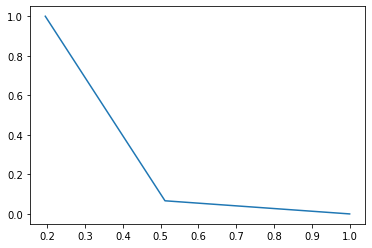

In [37]:
## P-R曲线
precision, recall, thresholds = precision_recall_curve(lrtest_y, lrpre_y)
plt.plot(precision, recall)

Text(0.5, 0, 'FPR')

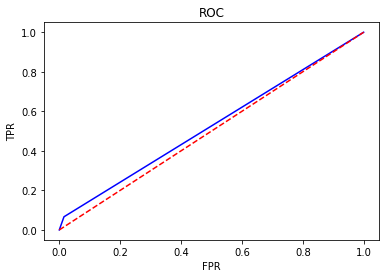

In [38]:
## ROC曲线
FPR,TPR,thresholds=roc_curve(lrtest_y, lrpre_y)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [39]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
FPR,TPR,thresholds=roc_curve(lrtest_y, lrpre_y)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.05105912948353669


### Accuracy of Logistic Regression

In [94]:
print("The accuracy of Logistic Regression prediction is", 
      '{:.2%}'.format(accuracy_score(lrtest_y,lrpre_y)))

The accuracy of Logistic Regression prediction is 80.57%


### Log Loss of Logistic Regression

In [95]:
#y_pred = pre_y / pre_y.sum(axis=1)[:, np.newaxis]
lrpre_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
lrtest_y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
#print("The log loss of Logistic Regression prediction is", 
   #   '{:.2}'.format(log_loss(y_true = test_y , y_pred = pre_y,labels=['test_y','pre_y'])))

print("The log loss of Logistic Regression prediction is", 
      '{:.2}'.format(log_loss(lrtest_y, lr.predict_proba(lrtest_x) )))

The log loss of Logistic Regression prediction is 0.45


### Confusion Matrix on Logistic Regression

In [98]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = lrtest_y, 
            columns  = lrpre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94934,1480,96414
1,21790,1550,23340
All,116724,3030,119754


In [99]:
print(classification_report(lrtest_y, lrpre_y))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     96414
           1       0.51      0.07      0.12     23340

    accuracy                           0.81    119754
   macro avg       0.66      0.53      0.50    119754
weighted avg       0.75      0.81      0.74    119754



## Supervised Learning - Decision Tree

In [40]:
%%time
from sklearn.tree import DecisionTreeClassifier as DTC
dtctrain_x = train_x
dtctrain_y=train_y
dtctest_x = test_x
dtctest_y = test_y

dtc = DTC()  # 建立逻辑回归模型
dtc = dtc.fit(dtctrain_x, dtctrain_y)  
# 用测试集做预测
dtcpre_y = dtc.predict(dtctest_x)

Wall time: 20.2 s


Precision 0.2732417453750683
Recall 0.29995715509854326
F1-score: 0.2859768800294105


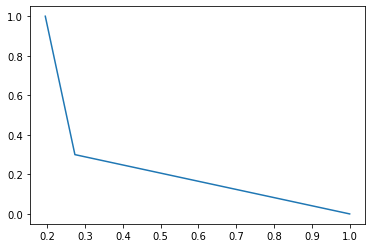

In [43]:
## Precision,Recall,F1-score
print('Precision',metrics.precision_score(dtctest_y, dtcpre_y))
print('Recall',metrics.recall_score(dtctest_y, dtcpre_y))
print('F1-score:',metrics.f1_score(dtctest_y, dtcpre_y))

## P-R曲线
precision, recall, thresholds = precision_recall_curve(dtctest_y, dtcpre_y)
plt.plot(precision, recall)

Text(0.5, 0, 'FPR')

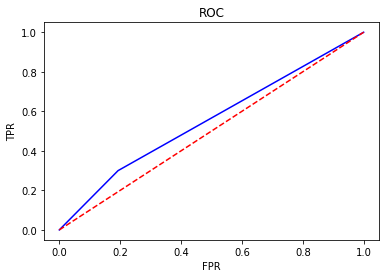

In [44]:
## ROC曲线
FPR,TPR,thresholds=roc_curve(dtctest_y, dtcpre_y)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [45]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
FPR,TPR,thresholds=roc_curve(dtctest_y, dtcpre_y)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.10682130345873991


### Accuracy of Decision Tree

In [101]:
print("The accuracy of Decision Tree prediction is", 
      '{:.2%}'.format(accuracy_score(dtctest_y,dtcpre_y)))

The accuracy of Decision Tree prediction is 70.91%


### Log Loss of Decision Tree

In [102]:
#y_pred = pre_y / pre_y.sum(axis=1)[:, np.newaxis]
dtcpre_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
dtctest_y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
#print("The log loss of Logistic Regression prediction is", 
   #   '{:.2}'.format(log_loss(y_true = test_y , y_pred = pre_y,labels=['test_y','pre_y'])))

print("The log loss of Decision Tree prediction is", 
      '{:.2}'.format(log_loss(dtctest_y, dtc.predict_proba(dtctest_x) )))

The log loss of Decision Tree prediction is 1e+01


### Confusion Matrix Decision Tree

In [105]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = dtctest_y, 
            columns  = dtcpre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,77920,18494,96414
1,16343,6997,23340
All,94263,25491,119754


In [106]:
print(classification_report(dtctest_y, dtcpre_y))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     96414
           1       0.27      0.30      0.29     23340

    accuracy                           0.71    119754
   macro avg       0.55      0.55      0.55    119754
weighted avg       0.72      0.71      0.71    119754



## 判别分析

In [46]:
%%time
from sklearn.neighbors import KNeighborsClassifier as KNC
knctrain_x = train_x
knctrain_y=train_y
knctest_x = test_x
knctest_y = test_y

knc = KNC()  # 建立判别模型
knc = knc.fit(knctrain_x, knctrain_y)  

# 用测试集做预测
kncpre_y = knc.predict(knctest_x)

Wall time: 20min 57s


In [47]:
## Precision,Recall,F1-score
print('Precision',metrics.precision_score(knctest_y, kncpre_y))
print('Recall',metrics.recall_score(knctest_y, kncpre_y))
print('F1-score:',metrics.f1_score(knctest_y, kncpre_y))


Precision 0.3533459000942507
Recall 0.1606255355612682
F1-score: 0.2208541973490427


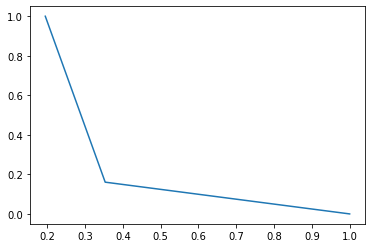

In [48]:
## P-R曲线
precision, recall, thresholds = precision_recall_curve(knctest_y, kncpre_y)
plt.plot(precision, recall)

Text(0.5, 0, 'FPR')

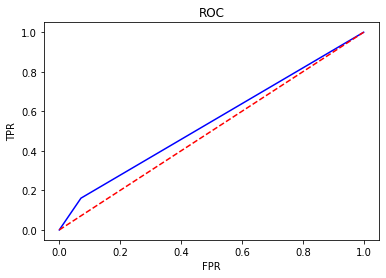

In [49]:
## ROC曲线
FPR,TPR,thresholds=roc_curve(knctest_y, kncpre_y)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [50]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
FPR,TPR,thresholds=roc_curve(knctest_y, kncpre_y)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.08946367110174988


### Accuracy of Decision KNC

In [25]:
print("The accuracy of KNC prediction is", 
      '{:.2%}'.format(accuracy_score(knctest_y,kncpre_y)))

The accuracy of KNC prediction is 77.91%


### Log Loss of Decision KNC

In [26]:
#y_pred = pre_y / pre_y.sum(axis=1)[:, np.newaxis]
kncpre_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
knctest_y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
#print("The log loss of Logistic Regression prediction is", 
   #   '{:.2}'.format(log_loss(y_true = test_y , y_pred = pre_y,labels=['test_y','pre_y'])))

print("The log loss of KNC prediction is", 
      '{:.2}'.format(log_loss(knctest_y, knc.predict_proba(knctest_x) )))

The log loss of KNC prediction is 2.2


### Confusion Matrix KNC

In [29]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = knctest_y, 
            columns  = kncpre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,89553,6861,96414
1,19591,3749,23340
All,109144,10610,119754


In [30]:
print(classification_report(knctest_y, kncpre_y))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     96414
           1       0.35      0.16      0.22     23340

    accuracy                           0.78    119754
   macro avg       0.59      0.54      0.55    119754
weighted avg       0.73      0.78      0.74    119754



## 神经网络

### 【50,50】

In [51]:
%%time
from sklearn.neural_network import MLPClassifier as MLP
mlptrain_x = train_x
mlptrain_y=train_y
mlptest_x = test_x
mlptest_y = test_y

mlp = MLP(solver = 'adam',hidden_layer_sizes = [50,50],max_iter = 2000,random_state = 0)# 建立神经网络模型
mlp = mlp.fit(mlptrain_x, mlptrain_y)  
# 用测试集做预测
mlppre_y = mlp.predict(mlptest_x)

Wall time: 10min 55s


In [52]:
## Precision,Recall,F1-score
print('Precision',metrics.precision_score(mlptest_y, mlppre_y))
print('Recall',metrics.recall_score(mlptest_y, mlppre_y))
print('F1-score:',metrics.f1_score(mlptest_y, mlppre_y))

Precision 0.5791035915701989
Recall 0.08359040274207369
F1-score: 0.14609307723988169


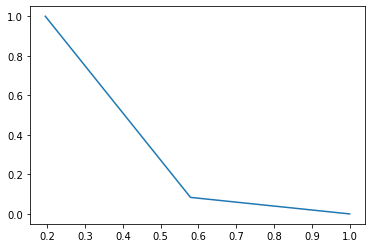

In [53]:
## P-R曲线
precision, recall, thresholds = precision_recall_curve(mlptest_y, mlppre_y)
plt.plot(precision, recall)

Text(0.5, 0, 'FPR')

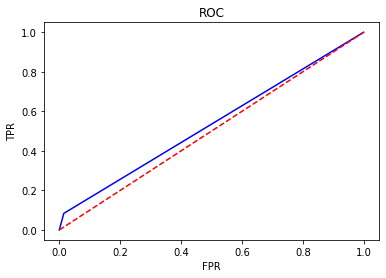

In [54]:
## ROC曲线
FPR,TPR,thresholds=roc_curve(mlptest_y, mlppre_y)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [55]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
FPR,TPR,thresholds=roc_curve(mlptest_y, mlppre_y)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.06888299510417878


### Accuracy of Decision MLP

In [32]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(mlptest_y,mlppre_y)))

The accuracy of MLP prediction is 80.96%


### Log Loss of Decision MLP

In [33]:
#y_pred = pre_y / pre_y.sum(axis=1)[:, np.newaxis]
mlppre_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
mlptest_y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
#print("The log loss of Logistic Regression prediction is", 
   #   '{:.2}'.format(log_loss(y_true = test_y , y_pred = pre_y,labels=['test_y','pre_y'])))

print("The log loss of MLP prediction is", 
      '{:.2}'.format(log_loss(mlptest_y, mlp.predict_proba(mlptest_x) )))

The log loss of MLP prediction is 0.44


### Confusion Matrix MLP

In [36]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = mlptest_y, 
            columns  = mlppre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94996,1418,96414
1,21389,1951,23340
All,116385,3369,119754


In [37]:
print(classification_report(mlptest_y, mlppre_y))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89     96414
           1       0.58      0.08      0.15     23340

    accuracy                           0.81    119754
   macro avg       0.70      0.53      0.52    119754
weighted avg       0.77      0.81      0.75    119754



### 【100,100】

### 【1200，1200】

In [41]:
%%time
from sklearn.neural_network import MLPClassifier as MLP
mlptrain_x2 = train_x
mlptrain_y2=train_y
mlptest_x2 = test_x
mlptest_y2 = test_y

mlp2 = MLP(solver = 'adam',hidden_layer_sizes = [1200,1200],max_iter = 200000,random_state = 0)# 建立神经网络模型
mlp2 = mlp2.fit(mlptrain_x2, mlptrain_y2)  
# 用测试集做预测
mlppre_y2 = mlp2.predict(mlptest_x2)

Wall time: 10min 49s


In [ ]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(mlptest_y2,mlppre_y2)))

In [ ]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = mlptest_y2, 
            columns  = mlppre_y2, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

In [24]:
%%time
from sklearn.neural_network import MLPClassifier as MLP
mlptrain_x3 = train_x
mlptrain_y3=train_y
mlptest_x3 = test_x
mlptest_y3 = test_y

mlp3 = MLP(solver = 'adam',hidden_layer_sizes = [500,500,500],max_iter = 20000,random_state = 0,tol = 1e-5)# 建立神经网络模型
mlp3 = mlp3.fit(mlptrain_x3, mlptrain_y3)  
# 用测试集做预测
mlppre_y3 = mlp3.predict(mlptest_x3)

Wall time: 8h 9min 28s


In [25]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(mlptest_y3,mlppre_y3)))

The accuracy of MLP prediction is 80.52%


In [55]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = mlptest_y3, 
            columns  = mlppre_y3, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94996,1418,96414
1,21389,1951,23340
All,116385,3369,119754


## GBDT

In [90]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.externals import joblib

gbdttrain_x = train_x
gbdttrain_y=train_y
gbdttest_x = test_x
gbdttest_y = test_y

gbr = GBDT(n_estimators = 3000,max_depth = 2,min_samples_split = 2,learning_rate = 0.1)
gbr.fit(gbdttrain_x,gbdttrain_y)
gbdtpre_y = gbr.predict(gbdttest_x)

Wall time: 2h 4min 57s


### Accuracy of Decision GBDT 

In [91]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(gbdttest_y,gbdtpre_y)))

The accuracy of MLP prediction is 81.06%


### Confusion Matrix GBDT

In [92]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = gbdttest_y, 
            columns  = gbdtpre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94773,1641,96414
1,21035,2305,23340
All,115808,3946,119754


In [ ]:
print(classification_report(gbdttest_y, gbdtpre_y))

In [ ]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(gbdttest_y2,gbdtpre_y2)))

### GBDT2

In [24]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.externals import joblib

gbdttrain_x2 = train_x
gbdttrain_y2=train_y
gbdttest_x2 = test_x
gbdttest_y2 = test_y

gbr2 = GBDT(n_estimators = 8000,max_depth = 2,min_samples_split = 2,learning_rate = 0.1)
gbr2.fit(gbdttrain_x2,gbdttrain_y2)
gbdtpre_y2 = gbr2.predict(gbdttest_x2)

Wall time: 5h 17min 44s


In [25]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(gbdttest_y2,gbdtpre_y2)))

The accuracy of MLP prediction is 81.05%


In [26]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = gbdttest_y2, 
            columns  = gbdtpre_y2, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94511,1903,96414
1,20790,2550,23340
All,115301,4453,119754


### GBDT3

In [26]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.externals import joblib

gbdttrain_x3 = train_x
gbdttrain_y3=train_y
gbdttest_x3 = test_x
gbdttest_y3 = test_y

gbr3 = GBDT(n_estimators = 5000,max_depth = 2,min_samples_split = 2,learning_rate = 0.1)
gbr3.fit(gbdttrain_x3,gbdttrain_y3)
gbdtpre_y3 = gbr3.predict(gbdttest_x3)

Wall time: 3h 24min 25s


In [27]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(gbdttest_y3,gbdtpre_y3)))

The accuracy of MLP prediction is 81.06%


In [28]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = gbdttest_y3, 
            columns  = gbdtpre_y3, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94649,1765,96414
1,20922,2418,23340
All,115571,4183,119754


### GBDT4!!!!

In [56]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.externals import joblib

gbdttrain_x4 = train_x
gbdttrain_y4=train_y
gbdttest_x4 = test_x
gbdttest_y4 = test_y

gbr4 = GBDT(n_estimators = 2000,max_depth = 2,min_samples_split = 2,learning_rate = 0.1)
gbr4.fit(gbdttrain_x4,gbdttrain_y4)
gbdtpre_y4 = gbr4.predict(gbdttest_x4)

Wall time: 1h 17min 45s


In [57]:
## Precision,Recall,F1-score
print('Precision',metrics.precision_score(gbdttest_y4, gbdtpre_y4))
print('Recall',metrics.recall_score(gbdttest_y4, gbdtpre_y4))
print('F1-score:',metrics.f1_score(gbdttest_y4, gbdtpre_y4))

Precision 0.5879410215903107
Recall 0.0956726649528706
F1-score: 0.1645662908099344


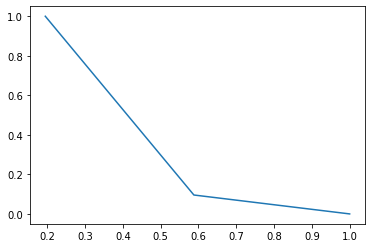

In [58]:
## P-R曲线
precision, recall, thresholds = precision_recall_curve(gbdttest_y4, gbdtpre_y4)
plt.plot(precision, recall)

Text(0.5, 0, 'FPR')

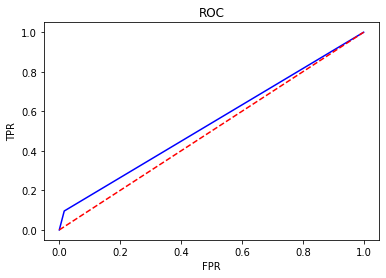

In [59]:
## ROC曲线
FPR,TPR,thresholds=roc_curve(gbdttest_y4, gbdtpre_y4)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [60]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
FPR,TPR,thresholds=roc_curve(gbdttest_y4, gbdtpre_y4)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.07944058247522214


In [26]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(gbdttest_y4,gbdtpre_y4)))

The accuracy of MLP prediction is 81.07%


In [27]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = gbdttest_y4, 
            columns  = gbdtpre_y4, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94849,1565,96414
1,21107,2233,23340
All,115956,3798,119754


### GBDT4

In [24]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.externals import joblib

gbdttrain_x5 = train_x
gbdttrain_y5=train_y
gbdttest_x5 = test_x
gbdttest_y5 = test_y

gbr5 = GBDT(n_estimators = 1000,max_depth = 2,min_samples_split = 2,learning_rate = 0.1)
gbr5.fit(gbdttrain_x5,gbdttrain_y5)
gbdtpre_y5 = gbr5.predict(gbdttest_x5)

Wall time: 41min 3s


In [25]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(gbdttest_y5,gbdtpre_y5)))

The accuracy of MLP prediction is 81.04%


In [26]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = gbdttest_y5, 
            columns  = gbdtpre_y5, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94980,1434,96414
1,21267,2073,23340
All,116247,3507,119754


In [27]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.externals import joblib

gbdttrain_x6 = train_x
gbdttrain_y6=train_y
gbdttest_x6 = test_x
gbdttest_y6 = test_y

gbr6 = GBDT(n_estimators = 2500,max_depth = 2,min_samples_split = 2,learning_rate = 0.1)
gbr6.fit(gbdttrain_x6,gbdttrain_y6)
gbdtpre_y6 = gbr6.predict(gbdttest_x6)

Wall time: 1h 40min 3s


In [28]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(gbdttest_y6,gbdtpre_y6)))

The accuracy of MLP prediction is 81.06%


In [29]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = gbdttest_y6, 
            columns  = gbdtpre_y6, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted,0,1,All
Actual,,,
0,94793,1621,96414
1,21063,2277,23340
All,115856,3898,119754


In [30]:
print(classification_report(gbdttest_y6, gbdtpre_y6))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     96414
           1       0.58      0.10      0.17     23340

    accuracy                           0.81    119754
   macro avg       0.70      0.54      0.53    119754
weighted avg       0.77      0.81      0.75    119754



# SVM

In [30]:
%%time
from sklearn.svm import SVC as SVM
svmtrain_x = train_x
svmtrain_y=train_y
svmtest_x = test_x
svmtest_y = test_y
clf = SVM( coef0=0.2, degree=3, gamma='auto', kernel='poly')
clf.fit(svmtrain_x, svmtrain_y) 
svmpre_y = clf.predict(svmtest_x)


Wall time: 2h 52min 24s


In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.externals import joblib



y_train = train_y # training label
y_test = test_y # testing label
X_train = train_x  # training dataset
X_test = test_x  # testing dataset

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 64,
    'num_trees': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# number of leaves,will be used in feature transformation
num_leaf = 64

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_train)

print('Save model...')
# save model to file
gbm.save_model('model.txt')


Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	training's binary_logloss: 0.492015
[2]	training's binary_logloss: 0.491169
[3]	training's binary_logloss: 0.49037
[4]	training's binary_logloss: 0.48957
[5]	training's binary_logloss: 0.488794
[6]	training's binary_logloss: 0.48805
[7]	training's binary_logloss: 0.487293
[8]	training's binary_logloss: 0.486552
[9]	training's binary_logloss: 0.485828
[10]	training's binary_logloss: 0.48512
[11]	training's binary_logloss: 0.484431
[12]	training's binary_logloss: 0.483744
[13]	training's binary_logloss: 0.483073
[14]	training's binary_logloss: 0.482417
[15]	training's binary_logloss: 0.481773
[16]	training's binary_logloss: 0.481155
[17]	training's binary_logloss: 0.480531
[18]	training's binary_logloss: 0.479919
[19]	training's binary_logloss: 0.479339
[20]	training's binary_logloss: 0.478751
[21]	train

In [26]:
# predict and get data on leaves, training data
print('Start predicting...')
y_pred = gbm.predict(X_train, pred_leaf=True)
print(np.array(y_pred).shape)
print(y_pred[0])

Start predicting...
(479016, 100)
[14 56 43 14 54 31 35 33 32 34  9 16 16 16 16 55 34 46 30 48 16 26 11 18
 18 53 43 55 62 37 13 16 18 18 18 15 15 16 38 17 42 47 45 51 54 23 48 48
 20 18 50 18 53 52 40 63 22 43 29 22 54 38 46 14 27 14 16 52  7 39 28 28
 32 28 12  7 42  7  7 31 16 33 26 60 58 39 43 25 54 25 11 11 26 40 13 32
 18 28 29 15]


In [27]:
array_ = np.zeros((10000,10000),dtype='float32') # 默认float64

In [28]:
print('Writing transformed training data')
transformed_training_matrix = np.zeros([len(y_pred), len(y_pred[0]) * num_leaf],
                                       dtype=np.int64)  # N * num_tress * num_leafs
for i in range(0, len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
    transformed_training_matrix[i][temp] += 1

Writing transformed training data


In [30]:
y_pred = gbm.predict(X_test, pred_leaf=True)
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred), len(y_pred[0]) * num_leaf], dtype=np.int64)
for i in range(0, len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
    transformed_testing_matrix[i][temp] += 1

Writing transformed testing data


In [34]:
lm = LR(penalty='l2',C=0.05) # logestic model construction
lm.fit(transformed_training_matrix,y_train)  # fitting the data
y_pred_test = lm.predict_proba(transformed_testing_matrix)   # Give the probabilty on each label

MemoryError: Unable to allocate 22.8 GiB for an array with shape (479016, 6400) and data type float64